✅ CSV file created successfully.

⏳ Training Gradient Descent model...
------------------------------
Slope (m): 171.8685
Intercept (b): 2.4776
Prediction for 2500 sqft: $429673.85
------------------------------


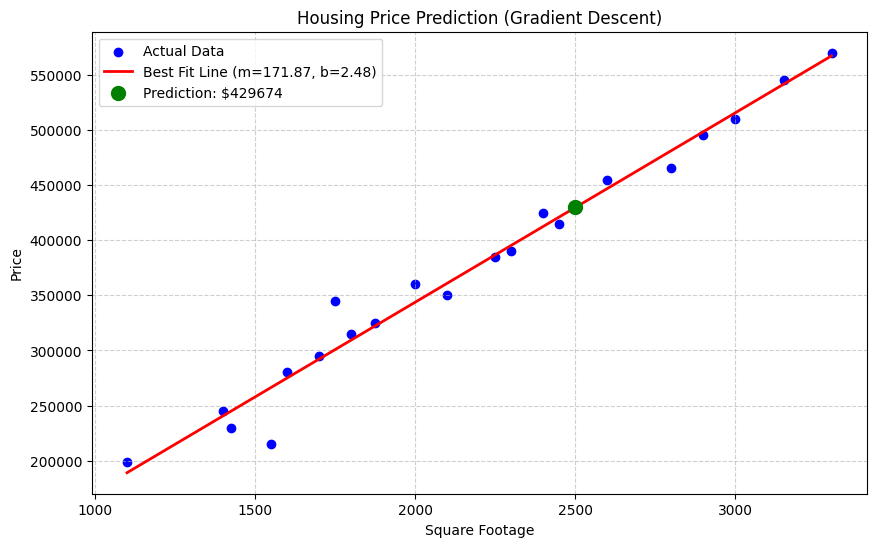

In [10]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# --- STEP 1: CREATE THE CSV FILE (For reproducibility) ---
# This ensures you have the file 'housing_data.csv' to read.
raw_data = [
    ["SquareFootage", "Price"],
    [1100, 199000], [1400, 245000], [1425, 230000], [1550, 215000],
    [1600, 280000], [1700, 295000], [1750, 345000], [1800, 315000],
    [1875, 325000], [2000, 360000], [2100, 350000], [2250, 385000],
    [2300, 390000], [2400, 425000], [2450, 415000], [2600, 455000],
    [2800, 465000], [2900, 495000], [3000, 510000], [3150, 545000],
    [3300, 570000]
]

with open('housing_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(raw_data)
print(" CSV file created successfully.\n")


# --- STEP 2: MANUALLY READ CSV & FIX DATA TYPES ---
def read_data(filename):
    X_list = []
    Y_list = []

    with open(filename, 'r') as file:
        # CRITICAL FIX: Skip the first line (Header)
        header = next(file)

        for line in file:
            parts = line.strip().split(',')
            # Convert string to float immediately to avoid TypeErrors
            X_list.append(float(parts[0]))
            Y_list.append(float(parts[1]))

    return np.array(X_list), np.array(Y_list)

X, Y = read_data('housing_data.csv')


# --- STEP 3: GRADIENT DESCENT ALGORITHM ---
def gradient_descent(X, Y, learning_rate, epochs):
    # Initialize slope (m) and intercept (b) at 0
    m = 0.0
    b = 0.0
    N = len(X)

    cost_history = []

    for i in range(epochs):
        # 1. Prediction
        Y_pred = m * X + b

        # 2. Calculate Gradients (derivatives)
        dm = (-2/N) * np.sum(X * (Y - Y_pred))
        db = (-2/N) * np.sum(Y - Y_pred)

        # 3. Update Parameters
        m = m - (learning_rate * dm)
        b = b - (learning_rate * db)

        # Optional: Track cost to ensure it's decreasing
        if i % 10000 == 0:
            current_cost = (1/N) * np.sum((Y - Y_pred)**2)
            cost_history.append(current_cost)

    return m, b, cost_history

# Parameters (tuned for unscaled data)
learning_rate = 0.0000001  # 1e-7
epochs = 100000

print("⏳ Training Gradient Descent model...")
m, b, costs = gradient_descent(X, Y, learning_rate, epochs)


# --- STEP 4: PREDICTION & OUTPUT ---
target_sqft = 2500
predicted_price = m * target_sqft + b

print("-" * 30)
print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")
print(f"Prediction for {target_sqft} sqft: ${predicted_price:.2f}")
print("-" * 30)


# --- STEP 5: VISUALIZATION ---
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data')

# Create the best fit line
line_x = np.linspace(min(X), max(X), 100)
line_y = m * line_x + b
plt.plot(line_x, line_y, color='red', linewidth=2, label=f'Best Fit Line (m={m:.2f}, b={b:.2f})')

# Highlight the prediction point
plt.scatter([target_sqft], [predicted_price], color='green', s=100, zorder=5, label=f'Prediction: ${predicted_price:.0f}')

plt.title('Housing Price Prediction (Gradient Descent)')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()